# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [152]:
# import dependencies
import pandas as pd
import datetime as datetime
from datetime import datetime

# loading the data into a dataframe
Sales_DF = pd.read_csv('Resources\Sales_Data.csv')

Sales_DF.head()

# Converting str in "date" into datetime
Sales_DF['date'] = pd.to_datetime(Sales_DF['date'] , format = "%Y-%m-%d")


## 💪 Challenge / Scope
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

### Data Cleaning and preparation



In [153]:
# Looking for missing values in the dataset
Sales_DF.count() # 1000 records present in each column

# Looking for duplicate records
Sales_DF.drop_duplicates(inplace=True)

Sales_DF.shape # looks like no duplicate records are present

# Converting the strings in "date" to datetime format

(1000, 8)

### Sales by Payment Method

In [154]:
# Group the sales by payment method
Payment_group = Sales_DF.groupby(['payment'])

# Sum all of the sales by payment type
Sales_By_Payment = Payment_group['total'].sum()

# Converting into values relative to the total number of sales
Prct_Sales = (Sales_By_Payment / Sales_By_Payment.sum()) * 100

<AxesSubplot:title={'center':'Sales By Payment Type'}, ylabel='Total Sales'>

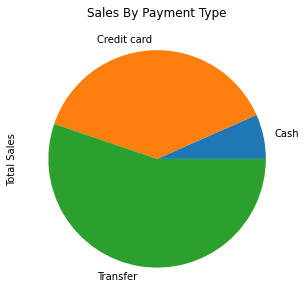

In [155]:
# Plotting the total sales by payment using a pie chart
Prct_Sales.plot.pie(title = 'Sales By Payment Type' , figsize = (5,5) , ylabel = 'Total Sales')

### Insights
* Tha majority of sales were completed using transfers
* Cash was the payment type used the least

### Average Price per Product Line

In [156]:
#There are six unique product lines in this database
print(len(Sales_DF['product_line'].unique()))

# Group by product line
Product = Sales_DF.groupby(['product_line'])

# Computing the mean unit price per product line
avg_unit_price = Product['unit_price'].mean()
print(avg_unit_price)

6
product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64


<AxesSubplot:title={'center':'Average unit price by Product Line'}, xlabel='Product Line', ylabel='Price'>

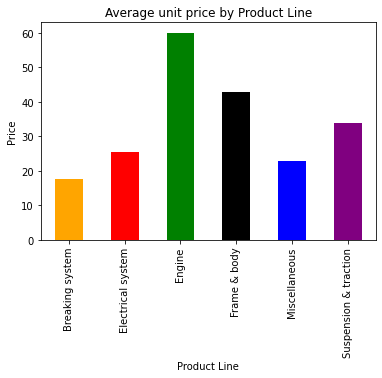

In [157]:
# Plotting the average price using a bar chart
avg_unit_price.plot.bar(title = 'Average unit price by Product Line' , color = ['orange', 'red' , 'green' , 'black' , 'blue' , 'purple']
, xlabel = 'Product Line' , ylabel = 'Price')

### Insights
* The Product line with the highest average unit price is the engine
* The product line with the smallest cost per unit are products belonging to the breaking system

### Total Sales by Warehouse Location

<AxesSubplot:title={'center':'Total Sales Per Warehouse'}, ylabel='total'>

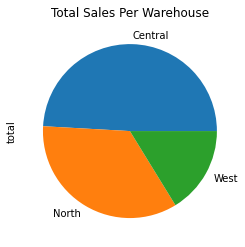

In [158]:
# Group the dataframe by warehouse location
Sales_By_Warehouse = Sales_DF.groupby(['warehouse'])

# summing the sales by warehouse location
Warehouse_Total = Sales_By_Warehouse['total'].sum()

# Representing data as pie chart
Warehouse_Total.plot.pie(title = 'Total Sales Per Warehouse')


### Insights
* The Central region contains the bulk of the sales in this datasest
* The regions supported by the West warehouse show the weakest sales
* Analysis on the sales in the regions supported by the West warehouse may reveal why performance is poor

### Patterns in Western Sales
Because the region supported by the West warehouse saw the smallest total sales we will investigate to see if there are any patterns that can explain why.

<ipython-input-181-ab91acf66395>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Western_Sales['month'] = pd.cut(Western_Sales.date.dt.month , 3 , labels = ['Jun' , 'Jul' , 'August'])


<AxesSubplot:title={'center':'Sales By Month (West)'}, xlabel='month', ylabel='Total Sales (USD$)'>

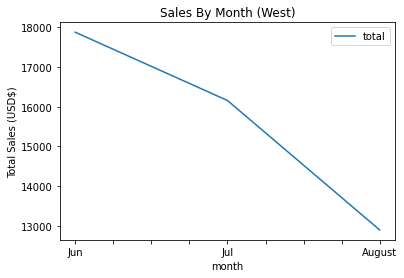

In [181]:
# Time series of Western Sale Data
# Filter out records by sales made in the western region
Western_Sales = Sales_DF[Sales_DF['warehouse'] == 'West']

# Bin dates by month
Western_Sales['month'] = pd.cut(Western_Sales.date.dt.month , 3 , labels = ['Jun' , 'Jul' , 'August'])

# compute total sales per month
Western_Sales_Monthly = Western_Sales.groupby(['month'])['total'].sum()

Western_Sales_Monthly.plot.line(title = 'Sales By Month (West)' , ylabel = 'Total Sales (USD$)', legend = True)

In [204]:
import numpy as np
# Computing some metrics
pct_decline = (Western_Sales_Monthly[2] - Western_Sales_Monthly[0]) / (np.average(Western_Sales_Monthly[[0,2]]))

print(pct_decline)
print("Sales dropped by" +  "{:.2%}".format(pct_decline) + " between June and August")

-0.32329299910760834
Sales dropped by-32.33% between June and August


### Insights
* There was a 32% decreases in sales during the 3 month periods
* Was this a normal phenomenon across the other regions , or could there be some event specific to the west around these months that could explain weak sales?

In [246]:
# Collect region specific dataframes within a list
regions_list = ['Central' , 'North' , 'West']
Regional_Sales = [] # initializing list

# Split original data by region
for regions in regions_list:
    region_df = Sales_DF[Sales_DF['warehouse'] == regions]
    Regional_Sales.append(region_df)

# {0: Central , 1: North , 2: West}

# Bin the dates by month for each dataframe
for regions in Regional_Sales:

    regions['month'] = pd.cut(regions.date.dt.month , 3 , labels=['Jun' , 'Jul' , 'Aug'])


monthly_totals = []

for region in Regional_Sales:
    monthly_totals.append(region.groupby(['month']).total.sum())
    



<ipython-input-246-5e31ae1a1886>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['month'] = pd.cut(regions.date.dt.month , 3 , labels=['Jun' , 'Jul' , 'Aug'])


C:\Users\daypa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


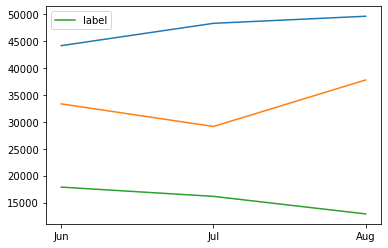

In [274]:
import matplotlib.pyplot as plt
# create a line plot for each region
fig = plt.figure()
for region in monthly_totals:
    line = plt.plot(region , label = 'label')
    plt.legend(handles = line)
    


<function list.index(value, start=0, stop=9223372036854775807, /)>